In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from gie import GosInE
from simulation_util import *

In [11]:
def load_regrets(delta, high, low, n = 20, k = 50, iters = 100, alpha = 1, root_dir="../data/network"):
    regrets = []
    t = 100000

    for i in range(iters):
        comp = pickle.load(open(f"{root_dir}/comp_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))
        ring = pickle.load(open(f"{root_dir}/ring_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))
        star = pickle.load(open(f"{root_dir}/star_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))
        
        comp_reg = comp.average_regret()
        ring_reg = ring.average_regret()
        star_reg = star.average_regret()
        
        for j in range(0, 100000, 10000):
            regrets.append([j, "COMP", comp_reg[j]])
            regrets.append([j, "CYCLE", ring_reg[j]])
            regrets.append([j, "STAR", star_reg[j]])
            
    return regrets

In [4]:
def load_data(delta, high, low, alpha, t = 100000, k = 20, n = 5, iters = 14, root_dir="../data/conn2"):
    star = []
    ring = []
    complete = []

    for i in range(iters):
        star.append(pickle.load(open(f"{root_dir}/star_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb")))
        ring.append(pickle.load(open(f"{root_dir}/ring_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb")))
        complete.append(pickle.load(open(f"{root_dir}/complete_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb")))

    return (star, ring, complete)

In [12]:
def plot_results(delta, high, low, k, n):
    regrets = load_regrets(delta, high, low)
    
    df = pd.DataFrame(regrets, columns = ["Time", "Network", "Regret"])
    #print(df)
    g = sns.lineplot(data = df, x = "Time", y = "Regret", hue = "Network", markers = True, err_style="bars", ci = 95)
    g.legend_.set_title(None)

In [5]:
def plot_results(delta, high, low, k, n):
    # Load data
    (stars, rings, completes) = load_data(delta=delta, high=high, low=low, alpha = 1, k = k, n = n)
    
    # Average Results
    star_avg_cum_reg = average_results([star.average_regret() for star in stars])
    ring_avg_cum_reg = average_results([ring.average_regret() for ring in rings])
    comp_avg_cum_reg = average_results([comp.average_regret() for comp in completes])

    # Plot Data
    plt.plot(star_avg_cum_reg, color="r", label="STAR")
    plt.plot(ring_avg_cum_reg, color="g", label="CYCLE")
    plt.plot(comp_avg_cum_reg, color="b", label="COMPLETE")
    plt.xlabel("Time")
    plt.ylabel("Regret")
    plt.legend()
    plt.show()

In [6]:
def estimate_tau(delta, high, low, k, n):
    (stars, rings, completes) = load_data(delta=delta, high=high, low=low, alpha = 1, k = k, n = n)
    
    star_per = np.zeros(len(stars[0].nodes[0].recommendations_recieved))
    ring_per = np.zeros(len(stars[0].nodes[0].recommendations_recieved))
    comp_per = np.zeros(len(stars[0].nodes[0].recommendations_recieved))
    
    for i in range(len(stars)):
        star_per = np.add(star_per, best_arm_percentage_over_time(stars[i].nodes, stars[i].arms.best_arm()))
        ring_per = np.add(ring_per, best_arm_percentage_over_time(rings[i].nodes, rings[i].arms.best_arm()))
        comp_per = np.add(comp_per, best_arm_percentage_over_time(completes[i].nodes, completes[i].arms.best_arm()))
        
    star_per = np.true_divide(star_per, len(stars))
    ring_per = np.true_divide(ring_per, len(stars))
    comp_per = np.true_divide(comp_per, len(stars))
    
    plt.plot(star_per, color="r", label="STAR")
    plt.plot(ring_per, color="g", label="CYCLE")
    plt.plot(comp_per, color="b", label="COMPLETE")
    plt.xlabel("Phase")
    plt.ylabel("% Best arm recommendations")
    plt.legend()
    plt.show()


In [7]:
def best_arm_percentage_over_time(nodes, best_arm_id):
    N = len(nodes)
    P = len(nodes[0].recommendations_recieved)
    
    per = []
    count = 0.0
    for i in range(P):
        for j in range(N):
            if nodes[j].recommendations_recieved[i] == best_arm_id:
                count += 1.0
        per.append(count/((i + 1) * N ))
        
    return per

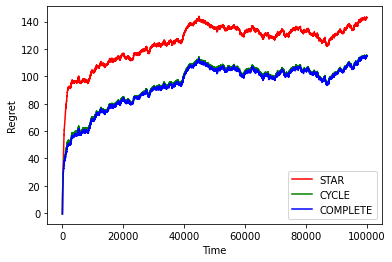

In [119]:
plot_results(0.1, 0.9, 0.2, 20, 5)

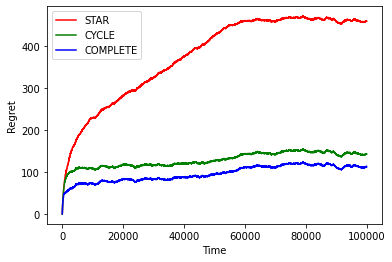

In [120]:
plot_results(0.1, 0.9, 0.2, 30, 10)

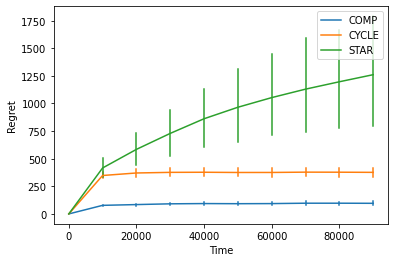

In [13]:
plot_results(0.1, 0.9, 0.2, 50, 20)

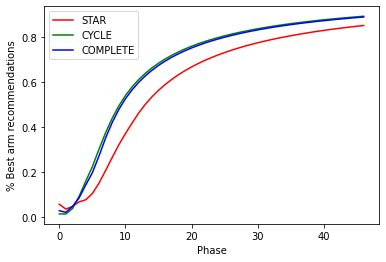

In [9]:
estimate_tau(0.1, 0.9, 0.2, 20, 5)

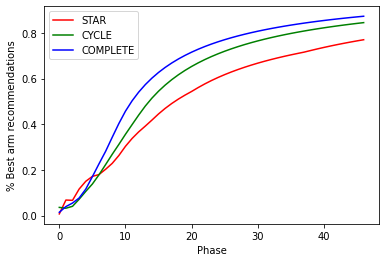

In [10]:
estimate_tau(0.1, 0.9, 0.2, 30, 10)

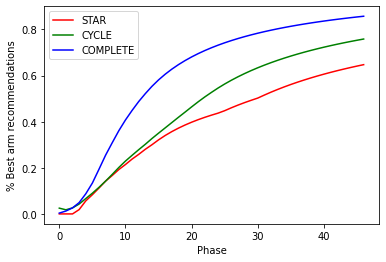

In [11]:
estimate_tau(0.1, 0.9, 0.2, 50, 20)